In [3]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from bs4 import BeautifulSoup as bs
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
from tqdm import tqdm_notebook as tqdm
import requests as req
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 17, 8
rcParams['font.family'] ='AppleGothic'

#### 크롤링

In [2]:
driver = webdriver.Chrome(ChromeDriverManager().install())
#driver.get('https://www.amazon.com/Nespresso-VertuoPlus-Espresso-DeLonghi-Aeroccino/dp/B01MTZ419O/ref=sr_1_2?crid=2SMG4SVV7J820&keywords=Nespresso+VertuoPlus+Coffee+and+Espresso+Machine+by+De%27Longhi+with+Milk+Frother%2C+Grey&qid=1664185758&qu=eyJxc2MiOiIwLjAwIiwicXNhIjoiMC4wMCIsInFzcCI6IjAuMDAifQ%3D%3D&sprefix=nespresso+vertuoplus+coffee+and+espresso+machine+by+de%27longhi+with+milk+frother%2C+grey%2Caps%2C232&sr=8-2')
driver.get('https://www.amazon.com/Nespresso-VertuoPlus-Espresso-DeLonghi-Aeroccino/product-reviews/B01N1QSB6J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&language=ko_KR')
time.sleep(1)

In [36]:
name_list = []
score_list = []
date_list = []
style_list = []
review_list = []

while True:
    try:
        star = bs(driver.page_source, "html.parser")
        score = star.find_all("i",{'data-hook':"review-star-rating"})
        date = driver.find_elements_by_css_selector('span.a-size-base.a-color-secondary.review-date')
        style = driver.find_elements_by_css_selector('a.a-size-mini.a-link-normal.a-color-secondary')
        review = driver.find_elements_by_css_selector("div.a-row.a-spacing-small.review-data")
        #time.sleep(1)
        for i in score:
            score_list.append(i.text)
        for i in date:
            date_list.append(i.text)
        for i in style:
            style_list.append(i.text)
        for i in review:
            review_list.append(i.text)
        #time.sleep(1)
        btn = driver.find_element_by_css_selector('#cm_cr-pagination_bar > ul > li.a-last')
        btn.click()
        time.sleep(2)
    except:
        break

In [37]:
len(score_list),len(date_list),len(style_list),len(review_list)

(2090, 2652, 2208, 2208)

In [38]:
Coffee1 = {'Star': score_list}

In [39]:
Coffee2 = {'Date': date_list}

In [42]:
Coffee3 = {'Style': style_list, 'Review': review_list}

In [43]:
coffee1 = pd.DataFrame(Coffee1)
coffee2 = pd.DataFrame(Coffee2)
coffee3 = pd.DataFrame(Coffee3)

In [44]:
coffee = pd.concat([coffee1, coffee2, coffee3],axis=1)
coffee.to_csv('coffee.csv')

#### csv파일 불러오기

In [5]:
date = pd.read_csv('homecafe.csv',encoding='utf-8')
cafe = date.head(2090)

In [6]:
cafe.to_csv('homecafe.csv')

In [7]:
homecafe = pd.read_csv('homecafe.csv', encoding='utf-8')
homecafe

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Star,Date,Style,Review
0,0,0,0,별 5개 중 5.0,Reviewed in the United States 🇺🇸 on 2017년 12월 15일,스타일: 머신 + 에어로색상: 그레이,"""Is this a good coffee maker?"" Well, that's go..."
1,1,1,1,별 5개 중 5.0,Reviewed in the United States 🇺🇸 on 2018년 11월 28일,스타일: 기계 전용색상: 블랙,We have used this machine daily since purchase...
2,2,2,2,별 5개 중 5.0,Reviewed in the United States 🇺🇸 on 2018년 12월 10일,스타일: 기계 전용색상: 그레이,The inside box that the machine came in had be...
3,3,3,3,별 5개 중 5.0,Reviewed in the United States 🇺🇸 on 2022년 9월 15일,스타일: 머신 + 에어로색상: 타이탄.,I’m loving this machine! I’ve had many differe...
4,4,4,4,별 5개 중 5.0,Reviewed in the United States 🇺🇸 on 2022년 9월 24일,스타일: 기계 전용색상: 블랙,This is the best purchase! My fiancé and I use...
...,...,...,...,...,...,...,...
2085,2085,2085,2085,별 5개 중 5.0,Reviewed in the United States 🇺🇸 on 2018년 1월 14일,스타일: 기계 전용색상: 그레이,SO MUCH FLAVOR.
2086,2086,2086,2086,별 5개 중 4.0,Reviewed in the United States 🇺🇸 on 2021년 12월 28일,스타일: 머신 + 에어로색상: 그레이,I've only had my Nespresso machine for a short...
2087,2087,2087,2087,별 5개 중 5.0,Reviewed in the United States 🇺🇸 on 2017년 12월 11일,스타일: 기계 전용색상: 레드,Nice and elegant
2088,2088,2088,2088,별 5개 중 5.0,Reviewed in the United States 🇺🇸 on 2017년 12월 15일,스타일: 기계 전용색상: 블랙,This machine has changed the way I do mornings...


In [8]:
homecafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.2  2090 non-null   int64 
 1   Unnamed: 0.1  2090 non-null   int64 
 2   Unnamed: 0    2090 non-null   int64 
 3   Star          2090 non-null   object
 4   Date          2090 non-null   object
 5   Style         2090 non-null   object
 6   Review        2083 non-null   object
dtypes: int64(3), object(4)
memory usage: 114.4+ KB


In [5]:
import nltk
from nltk import pos_tag
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import pickle
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\82104\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\82104\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\82104\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
review_list_nltk = ''
for i in review_list:
    review_list_nltk = review_list_nltk + i

NameError: name 'review_list' is not defined

In [7]:
review_list_nltk

''

In [10]:
nltk.corpus.stopwords.words('english')
stopwords = nltk.corpus.stopwords.words('english')

In [11]:
stopwords = ['i', 'be','see','lol.i','see','beans.i',
            'have','want','joe','look','bit','continue','winner.this',
            '”','t','bulletproof','say','“','do','me.i','coffee','try','use',
            '%','way','maker','cup','water','get','love','keurig','work',
            'day','amazon','box','year','pod','return','thing']

In [12]:
def extract_tags_english(string):
    word_list = []
    string = string.lower()
    string = nltk.word_tokenize(string)
    string = nltk.pos_tag(string)
       
    for word, tag in string:
        if tag in ['NN', 'VB']:
            if word not in stopwords: #if word not in stopwords:
                word_list.append(word)

    return word_list

In [13]:
review_list_nltk_update = extract_tags_english(review_list_nltk)
review_list_nltk_update

[]

In [14]:
count = Counter(review_list_nltk_update)
count

Counter()

In [15]:
count.most_common(10)

[]

In [83]:
from PIL import Image
import numpy as np

In [88]:
mask_image = np.array(Image.open(r"C:\Users\82104\Desktop\image\커피잔.jpg"))
mask_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [108]:
wordcloud = WordCloud(font_path='C:\Windows\Fonts\gulim.ttc',
                     width = 700,height=700
                      ,background_color='white',colormap = 'spring'
                      ,mask = mask_image
                      ,random_state=1).generate_from_frequencies(count)

<function matplotlib.pyplot.show(close=None, block=None)>

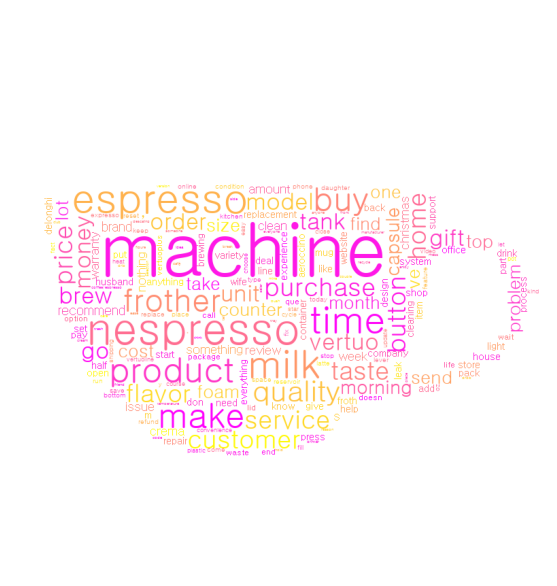

In [109]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title(" ", size = 30)
plt.show

In [10]:
cafe1 = pd.read_csv("homecafe.csv", encoding = 'utf-8')
cafe1['Star'] = cafe1['Star'].str.extract(r'(\d+.\d+)')
cafe1

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Star,Date,Style,Review
0,0,0,0,5.0,Reviewed in the United States 🇺🇸 on 2017년 12월 15일,스타일: 머신 + 에어로색상: 그레이,"""Is this a good coffee maker?"" Well, that's go..."
1,1,1,1,5.0,Reviewed in the United States 🇺🇸 on 2018년 11월 28일,스타일: 기계 전용색상: 블랙,We have used this machine daily since purchase...
2,2,2,2,5.0,Reviewed in the United States 🇺🇸 on 2018년 12월 10일,스타일: 기계 전용색상: 그레이,The inside box that the machine came in had be...
3,3,3,3,5.0,Reviewed in the United States 🇺🇸 on 2022년 9월 15일,스타일: 머신 + 에어로색상: 타이탄.,I’m loving this machine! I’ve had many differe...
4,4,4,4,5.0,Reviewed in the United States 🇺🇸 on 2022년 9월 24일,스타일: 기계 전용색상: 블랙,This is the best purchase! My fiancé and I use...
...,...,...,...,...,...,...,...
2085,2085,2085,2085,5.0,Reviewed in the United States 🇺🇸 on 2018년 1월 14일,스타일: 기계 전용색상: 그레이,SO MUCH FLAVOR.
2086,2086,2086,2086,4.0,Reviewed in the United States 🇺🇸 on 2021년 12월 28일,스타일: 머신 + 에어로색상: 그레이,I've only had my Nespresso machine for a short...
2087,2087,2087,2087,5.0,Reviewed in the United States 🇺🇸 on 2017년 12월 11일,스타일: 기계 전용색상: 레드,Nice and elegant
2088,2088,2088,2088,5.0,Reviewed in the United States 🇺🇸 on 2017년 12월 15일,스타일: 기계 전용색상: 블랙,This machine has changed the way I do mornings...


In [11]:
homecafe = cafe1['Style'].str.split("색상:", expand = True)
homecafe[0] = homecafe[0].str.replace("스타일: ", "")
homecafe.rename(columns={0: "Style", 1: "Color"}, inplace=True)
homecafe

,Style,Color
0,머신 + 에어로,그레이
1,기계 전용,블랙
2,기계 전용,그레이
3,머신 + 에어로,타이탄.
4,기계 전용,블랙
...,...,...
2085,기계 전용,그레이
2086,머신 + 에어로,그레이
2087,기계 전용,레드
2088,기계 전용,블랙


In [12]:
ymd = cafe1['Date'].str.replace("Reviewed in the United States 🇺🇸 on ", "")
ymd = ymd.str.replace("년 ", "-")
ymd = ymd.str.replace("월 ", "-")
ymd = ymd.str.replace("일", "")
ymdf = pd.to_datetime(ymd)
ymdf

0      2017-12-15
1      2018-11-28
2      2018-12-10
3      2022-09-15
4      2022-09-24
          ...    
2085   2018-01-14
2086   2021-12-28
2087   2017-12-11
2088   2017-12-15
2089   2018-11-28
Name: Date, Length: 2090, dtype: datetime64[ns]

In [13]:
homecafe['Star'] = cafe1['Star']
homecafe = homecafe[['Star','Style','Color']]
homecafe['Review'] = cafe1['Review']

In [14]:
homecafe['Date'] = ymdf
homecafe

,Star,Style,Color,Review,Date
0,5.0,머신 + 에어로,그레이,"""Is this a good coffee maker?"" Well, that's go...",2017-12-15
1,5.0,기계 전용,블랙,We have used this machine daily since purchase...,2018-11-28
2,5.0,기계 전용,그레이,The inside box that the machine came in had be...,2018-12-10
3,5.0,머신 + 에어로,타이탄.,I’m loving this machine! I’ve had many differe...,2022-09-15
4,5.0,기계 전용,블랙,This is the best purchase! My fiancé and I use...,2022-09-24
...,...,...,...,...,...
2085,5.0,기계 전용,그레이,SO MUCH FLAVOR.,2018-01-14
2086,4.0,머신 + 에어로,그레이,I've only had my Nespresso machine for a short...,2021-12-28
2087,5.0,기계 전용,레드,Nice and elegant,2017-12-11
2088,5.0,기계 전용,블랙,This machine has changed the way I do mornings...,2017-12-15


In [15]:
homecafe = homecafe[['Star','Date','Style','Color','Review']]
homecafe

,Star,Date,Style,Color,Review
0,5.0,2017-12-15,머신 + 에어로,그레이,"""Is this a good coffee maker?"" Well, that's go..."
1,5.0,2018-11-28,기계 전용,블랙,We have used this machine daily since purchase...
2,5.0,2018-12-10,기계 전용,그레이,The inside box that the machine came in had be...
3,5.0,2022-09-15,머신 + 에어로,타이탄.,I’m loving this machine! I’ve had many differe...
4,5.0,2022-09-24,기계 전용,블랙,This is the best purchase! My fiancé and I use...
...,...,...,...,...,...
2085,5.0,2018-01-14,기계 전용,그레이,SO MUCH FLAVOR.
2086,4.0,2021-12-28,머신 + 에어로,그레이,I've only had my Nespresso machine for a short...
2087,5.0,2017-12-11,기계 전용,레드,Nice and elegant
2088,5.0,2017-12-15,기계 전용,블랙,This machine has changed the way I do mornings...


In [16]:
homecafe = pd.DataFrame(homecafe)

In [17]:
homecafe = homecafe.astype({'Star':'float'})
homecafe

,Star,Date,Style,Color,Review
0,5.0,2017-12-15,머신 + 에어로,그레이,"""Is this a good coffee maker?"" Well, that's go..."
1,5.0,2018-11-28,기계 전용,블랙,We have used this machine daily since purchase...
2,5.0,2018-12-10,기계 전용,그레이,The inside box that the machine came in had be...
3,5.0,2022-09-15,머신 + 에어로,타이탄.,I’m loving this machine! I’ve had many differe...
4,5.0,2022-09-24,기계 전용,블랙,This is the best purchase! My fiancé and I use...
...,...,...,...,...,...
2085,5.0,2018-01-14,기계 전용,그레이,SO MUCH FLAVOR.
2086,4.0,2021-12-28,머신 + 에어로,그레이,I've only had my Nespresso machine for a short...
2087,5.0,2017-12-11,기계 전용,레드,Nice and elegant
2088,5.0,2017-12-15,기계 전용,블랙,This machine has changed the way I do mornings...


In [18]:
homecafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Star    2090 non-null   float64       
 1   Date    2090 non-null   datetime64[ns]
 2   Style   2090 non-null   object        
 3   Color   2090 non-null   object        
 4   Review  2083 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 81.8+ KB


In [19]:
homecafe.Style.unique()

array(['머신 + 에어로', '기계 전용', '기계 + 캡슐 VertuoLine', '머신 + 에어로치노',
       '기계 + 에어로치노 + 캡슐 세트', '기계 + 캡슐 세트'], dtype=object)

In [18]:
homecafe.Color.unique()

array([' 그레이', ' 블랙', ' 타이탄.', ' 레드', ' 잉크 블랙.', ' 매트 블랙.', ' LE 블랙 매트'],
      dtype=object)

In [20]:
style1 = homecafe['Style'].value_counts()
style1

기계 전용                 1192
머신 + 에어로               852
기계 + 캡슐 세트              18
기계 + 에어로치노 + 캡슐 세트      15
기계 + 캡슐 VertuoLine       8
머신 + 에어로치노               5
Name: Style, dtype: int64

In [21]:
style1 = homecafe['Color'].value_counts()
style1

 그레이         1106
 블랙           440
 레드           238
 타이탄.         236
 LE 블랙 매트      54
 잉크 블랙.        11
 매트 블랙.         5
Name: Color, dtype: int64